In [1]:
!conda install -c conda-forge pandas pandas-profiling matplotlib openpyxl -y

Solving environment: done

# All requested packages already installed.



In [2]:
#pip install pandas-profiling

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('churn_data.csv')

In [15]:
report = ProfileReport(df)
report.to_file('churn_data.html')

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
7039,2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.40,306.60,Yes


In [6]:
df.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

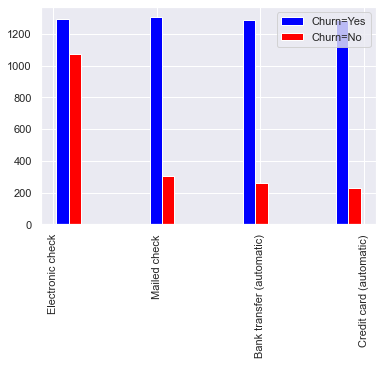

In [41]:
paym_churn_no = df[df.Churn=="No"].PaymentMethod
paym_churn_yes = df[df.Churn=="Yes"].PaymentMethod
plt.hist([paym_churn_no, paym_churn_yes], color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.xticks(rotation = 90)
plt.legend()
plt.show()

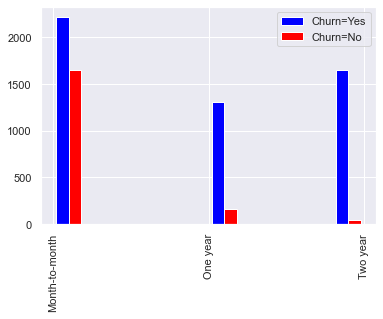

In [40]:
contract_churn_no = df[df.Churn=="No"].Contract
contract_churn_yes = df[df.Churn=="Yes"].Contract
plt.hist([contract_churn_no, contract_churn_yes], color=['blue','red'],label=['Churn=Yes','Churn=No'])
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [9]:
import seaborn as sns

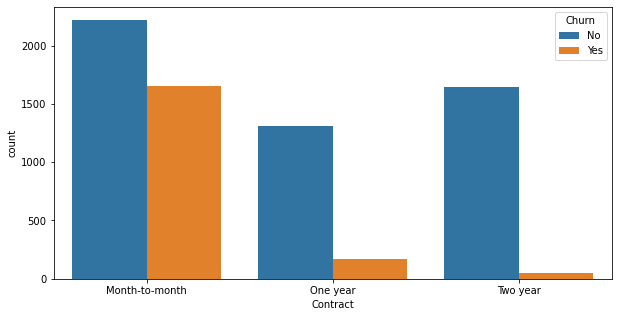

In [11]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
sns.countplot(x = "Contract", hue = "Churn", data = df)
plt.show()

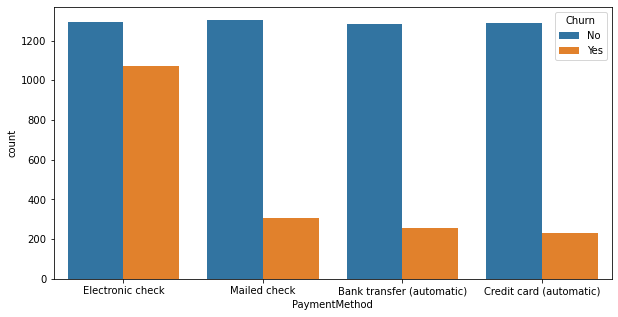

In [14]:
plt.figure(figsize = (10,5))
plt.subplot(1,1,1)
sns.countplot(x = "PaymentMethod", hue = "Churn", data = df)
plt.show()

In [15]:
possible_churn = ['PhoneService', 'Contract', 'PaymentMethod']

In [16]:
list(enumerate(possible_churn))

[(0, 'PhoneService'), (1, 'Contract'), (2, 'PaymentMethod')]

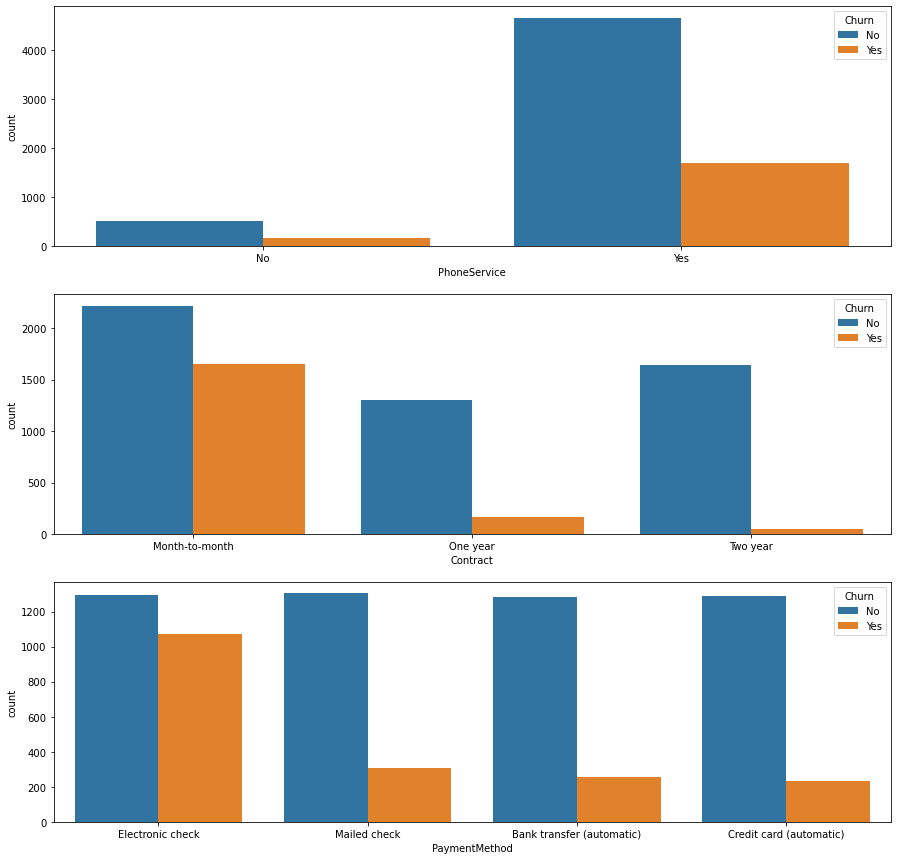

In [28]:
plt.figure(figsize = (15,15))
for i in enumerate(possible_churn):
    plt.subplot (3,1,i[0]+1)
    sns.countplot(x = i[1], hue = "Churn", data = df)

plt.show()

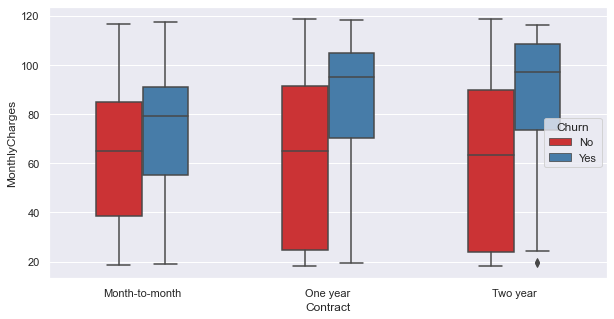

In [37]:
plt.figure(figsize = (10,5))
sns.boxplot(x="Contract", y= "MonthlyCharges", hue="Churn", data=df, palette="Set1", width=0.5)
plt.show()
#this chart would be more useful if I replaced the y value with the amount of clients, but I couldn't figure out how to get that

Analysis:
From the original auto-EDA analysis I was interested in the results that came up under the Cramér' V correlation anaylsis. I noticed Churn was moderately correlated with PaymentMethod and Contract, however PaymentMethod had 4 different subcategories and Contract had 3. In order to showcase the churn rate in each subcategory I created charts to visualize the differences (I also included a chart for PhoneService however there was no real correlation as expected). From the charts it is clear that Month-to-month has the biggest churn rate for the Contract category and Electronic check has the biggest churn rate for the PaymentMethod category. Overall the data shows that clients paying Month-to-month and clients paying with an Electronic check may be at higher risk of churn. The company should focus its attention to those individuals to decrease churn.   

*******************************************************************************************************************
Method:
(I know this isn't part of the assignment but I'm new to Python so I just want to explain my rationale)
I knew I needed to see the individual churn rates per subcategory. Everyone in each subcategory was either yes or no on churn so I had to find a way to separate the data further. I basically needed to create subplots for each category. At first I counted the amounth of yes and no in churn per subcategory and plotted that. I found a useful article on Kaggle that helped me do that. I continued searching for other ways to do it and I found a youtube video that showed how to create subplots with seaborn. This method was way easier and I even put it into a loop to automate the chart making process (another idea I got from youtube). I had no idea what hue meant until I read up on seaborn.
I tried to create a boxplot in the last line of code however I was unsuccessful because I couldn't figure out how to number the data or pull the number value of every client. I know each user is assigned a row/number value but I wasnt sure how to pull that value. Having my y value as MonthlyCharges isn't really useful for the boxplot so it didn't end up working out. 

In [42]:
said = "hello"
said

'hello'